#**GLASS**

In [ ]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving glass.csv to glass (2).csv


In [ ]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass[glass.duplicated()].shape

(1, 10)

In [ ]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df = glass.drop_duplicates()
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
correlation = df.corr()
correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

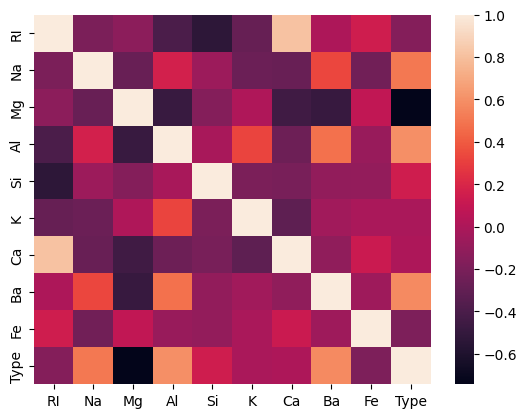

In [ ]:
sns.heatmap(correlation)

In [ ]:
#We can notice that Ca and K values don't affect Type that much.

#Also Ca and RI are highly correlated, this means using only RI is enough.

#So we can go ahead and drop Ca, and also K.
df = df.drop(['Ca','K'],axis=1)

<Axes: xlabel='RI', ylabel='Na'>

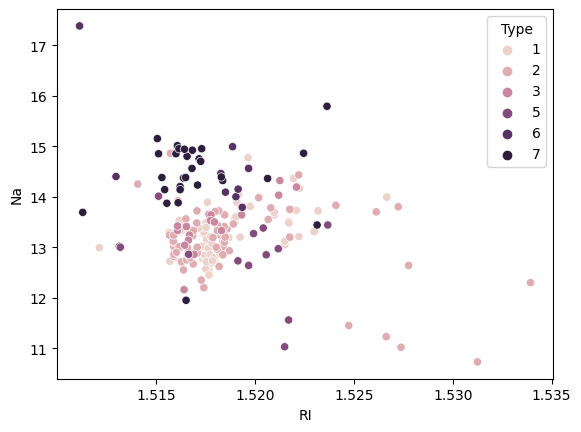

In [ ]:
sns.scatterplot(data=df, x="RI", y="Na", hue="Type")

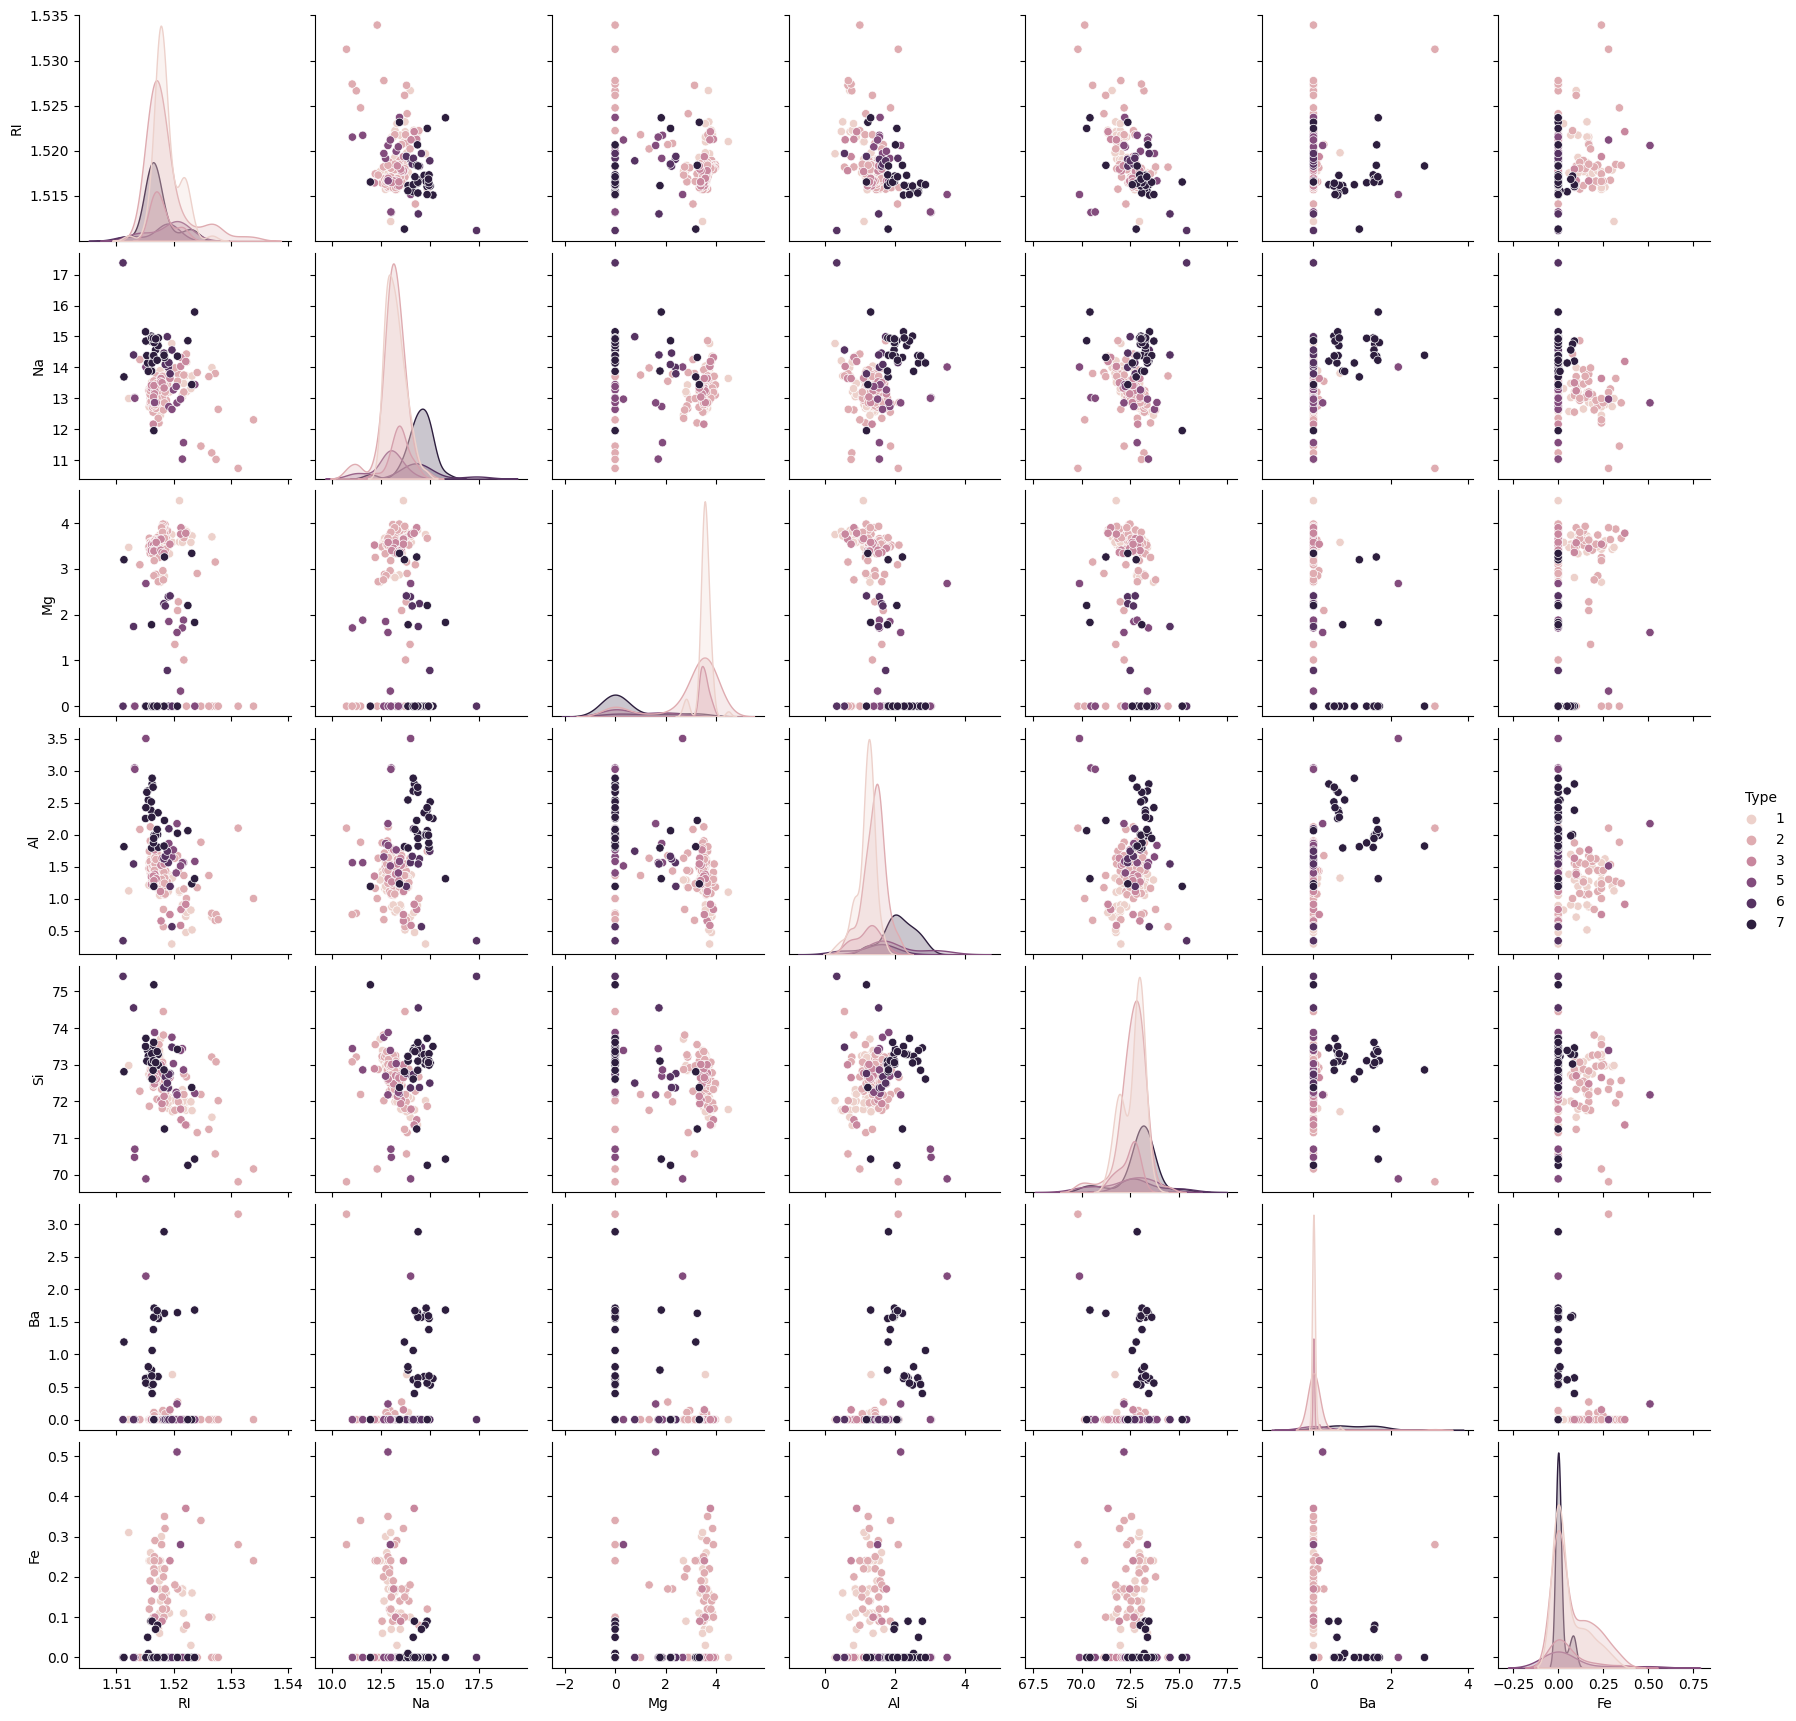

In [ ]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

##**FEARURE SCALING**

In [ ]:
DF= df.iloc[:,0:7]

In [ ]:
DF

,RI,Na,Mg,Al,Si,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0
...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0


In [ ]:
array = DF.values
array

array([[ 1.52101, 13.64   ,  4.49   , ..., 71.78   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ..., 72.73   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ..., 72.99   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ..., 73.42   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ..., 73.61   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ..., 73.36   ,  1.67   ,  0.     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalization function
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [ ]:
df_knn = pd.DataFrame(X,columns=df.columns[:-1])
df_knn

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,-0.353808,-0.588301
...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,2.804676,-0.588301


In [ ]:
x= df_knn
y= df['Type']

In [ ]:
x

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,-0.353808,-0.588301
...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,2.804676,-0.588301


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

##**GRIDSEARCHCV**

In [ ]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6808416389811739
{'n_neighbors': 3}


## MODEL FITTING

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=45)

In [ ]:
x_train

,RI,Na,Mg,Al,Si,Ba,Fe
185,0.010659,1.124177,0.403249,1.557355,-1.819617,2.925383,-0.588301
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,3.086325,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,2.945501,-0.588301
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,-0.353808,-0.588301
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,-0.353808,0.541526
...,...,...,...,...,...,...,...
32,-0.197547,-0.680073,0.555995,-0.443617,0.407845,-0.172748,1.671354
124,0.123025,-0.581882,0.680969,0.223374,-0.187871,-0.353808,0.644238
131,-0.071962,0.031808,0.903145,-0.544676,-0.213772,-0.353808,-0.588301
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,-0.353808,0.336103


In [ ]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [ ]:
x_test

,RI,Na,Mg,Al,Si,Ba,Fe
83,-1.407130,1.038260,0.285217,1.274389,-0.485730,-0.353808,-0.588301
62,1.296254,0.940070,0.785114,-1.353149,-1.690113,-0.353808,-0.588301
84,-0.693278,-0.054108,0.625425,0.081891,0.084086,-0.353808,-0.588301
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,-0.353808,-0.588301
187,1.362351,1.786963,-0.332710,1.233966,-3.101703,-0.353808,-0.588301
...,...,...,...,...,...,...,...
115,-0.019084,-0.201394,0.847601,-0.079804,-0.420978,-0.353808,0.438815
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,-0.353808,-0.588301
28,-0.220682,-1.036013,0.583767,-0.039380,0.640952,-0.353808,-0.588301
113,0.040403,-0.373227,0.896202,-0.524464,-0.278524,-0.353808,-0.588301


In [ ]:
y_test

84     2
63     1
85     2
138    2
188    7
      ..
116    2
4      1
28     1
114    2
126    2
Name: Type, Length: 64, dtype: int64

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts() # getting the count of each category

2    26
1    26
7     7
3     3
5     2
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,7
Type,,,,,
1,16,2,1,0,0
2,4,21,2,1,0
3,5,3,0,0,0
7,1,0,0,1,7


In [ ]:
model.score(x_train,y_train)

0.8053691275167785

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.62      0.84      0.71        19
           2       0.81      0.75      0.78        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.48      0.47      0.47        64
weighted avg       0.68      0.69      0.67        64



##**VISUALIZING THE CV**

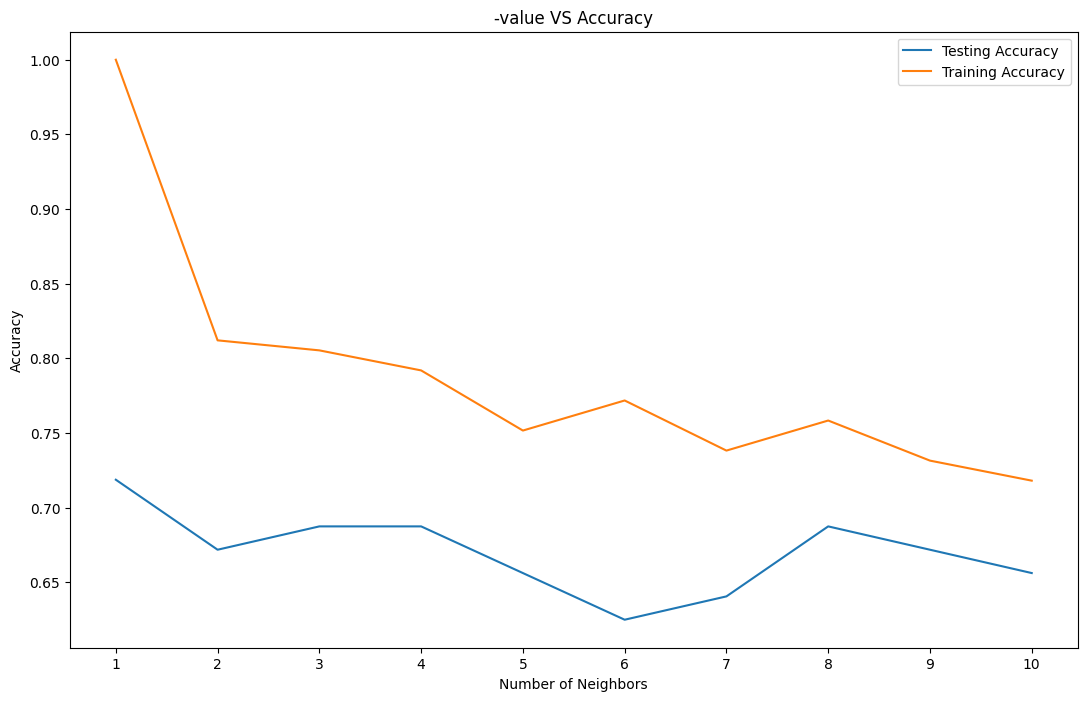

Best accuracy is 0.71875 with K = 1


In [ ]:
k_values = np.arange(1,11)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 11(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))